# Welcome to the Airbnb Mini Project!
#this project is exploring the revenues of NY Airbnb's.


In [4]:
import pandas as pd


In [5]:
ABNB = pd.read_csv("airbnb_2.csv")

In [38]:
ABNB.info()
ABNB.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#counting how many Airbnb listings are in each of the 5 Neighbourhood Groups.
ABNB_count = ABNB["neighbourhood_group"].value_counts()
print(ABNB_count)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [7]:
#calculating the percentage of Airbnb listings in each group
ABNB_per = ABNB["neighbourhood_group"].value_counts(normalize=True)
print(ABNB_per)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64


In [8]:
#creating a revenue field (Price x Number of Reviews) for later calculations
ABNB["Revenue"] = ABNB["price"]*ABNB["number_of_reviews"]
ABNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<AxesSubplot:title={'center':'Average Revenues by Neighbourhood Group'}, xlabel='neighbourhood_group'>

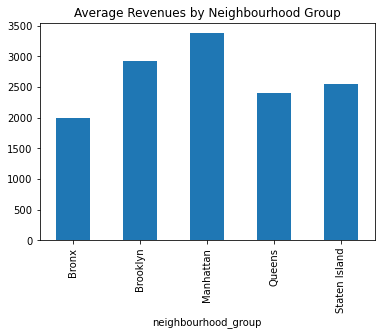

In [9]:
#bar plot to show avg revenues per group. 
ABNB_har = ABNB.groupby("neighbourhood_group")["Revenue"].mean()
ABNB_har.plot(kind = "bar", title="Average Revenues by Neighbourhood Group")


In [10]:
#focusing on 3 of the groups: manhattan, brooklyn, and queens. Then finding the top 3 neighbourhoods in each gorup.
filter_list = ["Brooklyn","Manhattan","Queens"]
ABNB_w_filter = ABNB[ABNB.neighbourhood_group.isin(filter_list)]
step1 = ABNB_w_filter.groupby(["neighbourhood_group","neighbourhood"]).sum()["Revenue"].sort_values(ascending=False)
step2 = pd.DataFrame(step1)
step3 = step2.reset_index().groupby(['neighbourhood_group']).head(3)
step3

,neighbourhood_group,neighbourhood,Revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
8,Brooklyn,Bushwick,4762224
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


<AxesSubplot:title={'center':'Average Revenue for Top 9 Neighbourhoods/Room Type'}, xlabel='neighbourhood,room_type'>

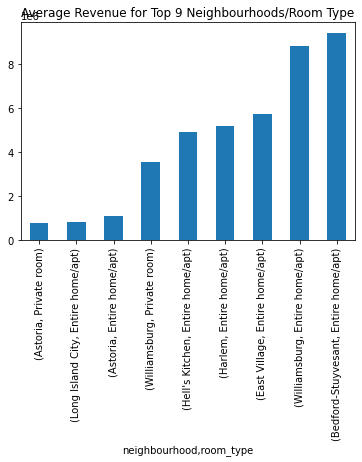

In [11]:
#finding the avg revenue by neighbourhood-room type
step2_1 = ABNB_w_filter.groupby(["neighbourhood_group","neighbourhood","room_type"]).sum()["Revenue"].sort_values(ascending=False)
step2_2 = step2_1.reset_index().groupby(["neighbourhood_group"]).head(3)
step2_3 = step2_2.groupby(["neighbourhood","room_type"])["Revenue"].mean().sort_values()
step2_3.plot(kind="bar",title = "Average Revenue for Top 9 Neighbourhoods/Room Type")